In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Import dataset of handwritten digits. 70000 digits, 60000 for data trining and 10000 for data validation.

In [2]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


Now we assign to each label of the digit a vector of 0 and 1 in the place of the label. 4 $\rightarrow [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]$.

x has size 28*28 =784

an example of a data point with label 4


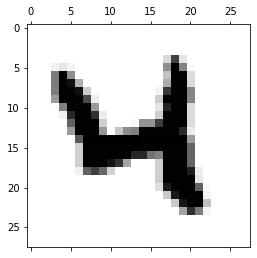

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument input_shape=(N_features,). The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(learning_rate=0.01, initial_accumulator_value=0.1, epsilon=1e-07, name="Adagrad"),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Now we train the network

In [6]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4974 - accuracy: 0.8552 - val_loss: 0.2189 - val_accuracy: 0.9369
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9256 - val_loss: 0.1647 - val_accuracy: 0.9510
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2100 - accuracy: 0.9416 - val_loss: 0.1376 - val_accuracy: 0.9581
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1789 - accuracy: 0.9500 - val_loss: 0.1198 - val_accuracy: 0.9631
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1560 - accuracy: 0.9567 - val_loss: 0.1111 - val_accuracy: 0.9649
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1388 - accuracy: 0.9606 - val_loss: 0.1020 - val_accuracy: 0.9673
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1259 - accuracy: 0.9643 - val_loss: 0.0939 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9743

Test loss: 0.08182442933320999
Test accuracy: 0.9743000268936157


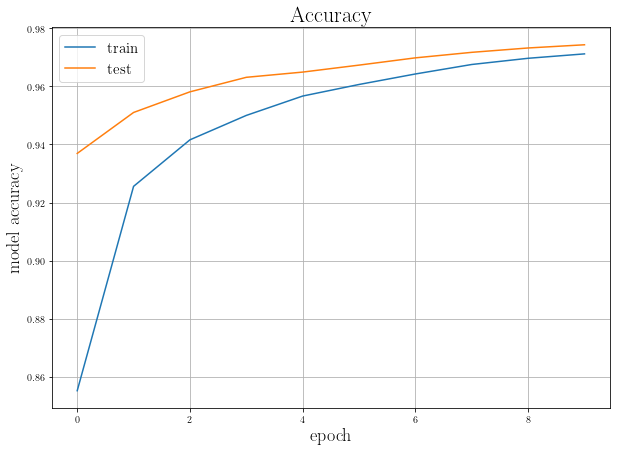

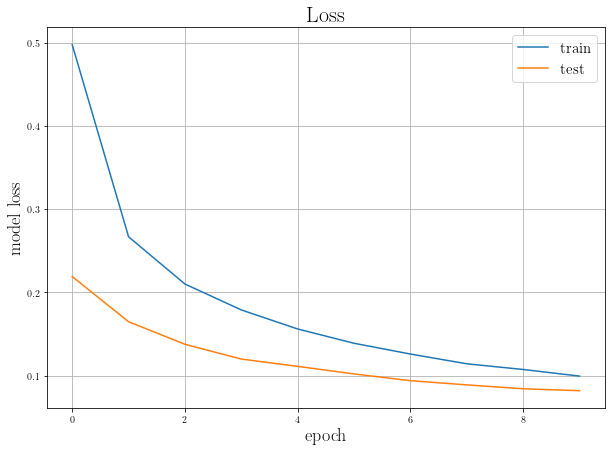

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

# summarize history for accuracy
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy', fontsize=22)
plt.ylabel('model accuracy', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='best', fontsize=15)
plt.grid(True)
plt.show()

# summarize history for loss
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss', fontsize=22)
plt.ylabel('model loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='best', fontsize=15)
plt.grid(True)
plt.show()

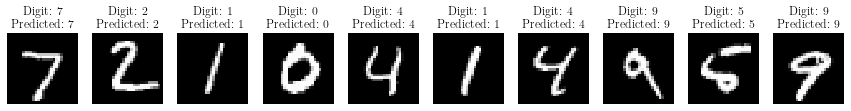

In [8]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [134]:
#saving network
save_model_path='DNN/Saved/Adadelta'
model_DNN.save(filepath=save_model_path, include_optimizer=True)

INFO:tensorflow:Assets written to: DNN/Saved/Adadelta/assets


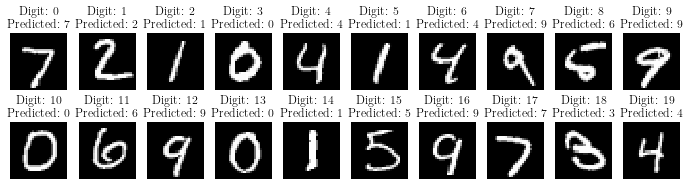

In [10]:
#recovering network
save_model_path='DNN/Saved/SGD'
model_old = tf.keras.models.load_model(filepath=save_model_path)

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols) #to give the correct input
predictions = model_old.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) #for plotting

plt.figure(figsize=(12, 3))
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(i, np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()